In [ ]:
#Extracted NYTimes COVID-19 dataset
!wget https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

#Installed Matrix Profile Package
!pip install matrixprofile-ts
! pip install pyts

import matrixprofile as mp
from matrixprofile import *
from matrixprofile.discords import discords
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyts.approximation import PiecewiseAggregateApproximation

#Stored dataset into a dataframe
df = pd.read_csv("us-counties.csv")

# Dataset contains 6 columns, data is available starting from 1st March 2020 to 16th June 2020
df.head()

--2020-06-22 03:42:53--  https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10065782 (9.6M) [text/plain]
Saving to: ‘us-counties.csv’

us-counties.csv     100%[===================>]   9.60M  25.0MB/s    in 0.4s    

2020-06-22 03:42:55 (25.0 MB/s) - ‘us-counties.csv’ saved [10065782/10065782]

     |████████████████████████████████| 2.5MB 2.8MB/s 


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [ ]:
#Selected Baltimore county for the analysis
df_md = df[df["county"] == "Baltimore"]
df_md_groupby = df_md.groupby("date").sum()
cases_md = df_md_groupby["cases"].values

new_dailycases_md = []
new_dailycases_md.append(cases_md[0])

for i in range(len(cases_md)-1):
    num_cases = cases_md[i+1] - cases_md[i]
    new_dailycases_md.append(num_cases)

new_dailycases_md = np.array(new_dailycases_md)
new_dailycases_md
#print(new_dailycases_md)
#print(len(new_dailycases_md))

array([  1,   0,   1,   1,   0,   1,   0,   3,   6,   0,   6,   9,   7,
         7,   9,  30,  22,  38,  21,  24,  41,  62,  64,  74,  64,  99,
        58,   4, 214, 113,  93, 101,  84, 104,  16, 113,  32,  54,  95,
        68, 142,  51,  89, 120, 102, 154, 122,  40,  85, 110,  90, 182,
       171, 118, 148, -18,  96, 135, 102, -25, 125,  86, 103, 108, 131,
       110, 150,  76, 125, 169, 105, 109,  35, 120,  83, 103,  22,  65,
       115, 142, 135, 110, 235,  86,  72,  19, 114, 107,  57,  61,  40,
        64,  70,  66,  57,  44,  48,  49,  81,  43,  32,  77])

In [ ]:
new_dailycases_md.max() # Num of cases reached a maximum of 235 --Find on which day there were 235 cases reported

235

####**Window Size=4**

In [ ]:
#Creating Matrix Profile with window size of 4
a = new_dailycases_md

m = 4

#Passing 2 parameters namely the array and window size
profile = matrixProfile.stomp(a,m)


print("Matrix Profile:",profile[0])
length_mp=len(profile[0])
print(len(a))
print(length_mp)
#print(np.amax(profile[0]))

Matrix Profile: [0.48411556 0.45862706 0.32895601 0.30455863 0.10091878 0.43992253
 0.62536094 0.27532227 0.28641635 0.13514936 0.42537692 0.34890046
 0.19081732 0.62139895 0.66430108 0.3034305  0.49557718 0.34890046
 0.43992253 0.33620284 0.65364799 0.17386147 0.10091878 0.15370177
 0.4275679  0.42519112 0.43426039 0.42537692 0.60585223 0.53634728
 0.27532227 0.28467092 0.07470244 0.30455863 0.44881395 0.32792612
 0.50967162 0.08281458 0.20048687 0.49557718 0.3036528  0.24367065
 0.08281458 0.43426039 0.05951771 0.24474176 0.28900423 0.13514936
 0.1355428  0.65077328 0.19263885 0.24474176 0.20513012 0.33849149
 0.28900423 0.17096563 0.45932147 0.3743899  0.41532133 0.37239042
 0.4380673  0.65364799 0.17386147 0.32128774 0.68948716 0.67772821
 0.24464079 0.62536094 0.32713834 0.53634728 0.25619617 0.41532133
 0.37239042 0.20513012 0.33849149 0.24464079 0.33620284 0.29801346
 0.45862706 0.42519112 0.15370177 0.30783746 0.23789105 0.6554243
 0.65576961 0.19263885 0.62299885 0.23789105 0.

In [ ]:
df_md_groupby["New Daily Cases"] = new_dailycases_md
df_md_groupby["profile"] = np.append(profile[0],np.zeros(m-1)+np.nan)

In [ ]:
print(new_dailycases_md)

[  1   0   1   1   0   1   0   3   6   0   6   9   7   7   9  30  22  38
  21  24  41  62  64  74  64  99  58   4 214 113  93 101  84 104  16 113
  32  54  95  68 142  51  89 120 102 154 122  40  85 110  90 182 171 118
 148 -18  96 135 102 -25 125  86 103 108 131 110 150  76 125 169 105 109
  35 120  83 103  22  65 115 142 135 110 235  86  72  19 114 107  57  61
  40  64  70  66  57  44  48  49  81  43  32  77]


In [ ]:
#Adding a new column that holds non-cumulative data for cases
df_md["New Daily Cases"] = new_dailycases_md
df_md.to_csv("df_md_non_cumu_1.csv")

###**Visualization**

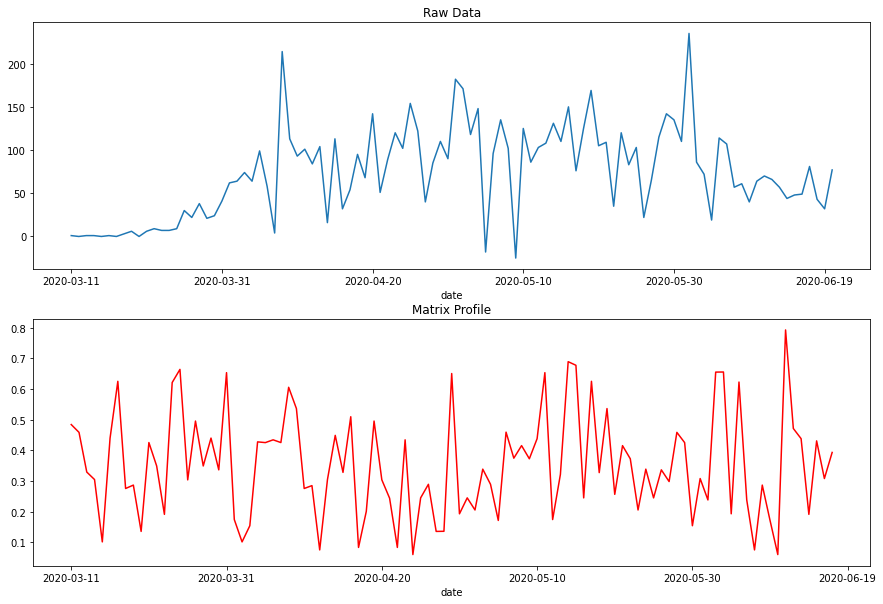

In [ ]:
#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10))
df_md_groupby['New Daily Cases'].plot(ax=ax1, title='Raw Data')

#Plot the Matrix Profile
df_md_groupby['profile'].plot(ax=ax2, c='r', title='Matrix Profile')
plt.show()

###**Statistics- Mean and SD**

In [ ]:
# Mean and Std Deviation for Matrix Profile and Raw Data
x = profile[0]

mn = np.mean(x)
sd = np.std(x)

#x = (x-mn)/sd
print("Matrix Profile Mean is:",mn.round(2))
print("Std deviation is:",sd.round(2))

#Mean and Std Deviation for raw data
cases_mean=np.mean(new_dailycases_md)
cases_sd=np.std(new_dailycases_md)
print("\nRaw Data Mean value is:",cases_mean.round(2))
print("Raw Data Std Dev value is:",cases_sd.round(2))

Matrix Profile Mean is: 0.35
Std deviation is: 0.17

Raw Data Mean value is: 73.55
Raw Data Std Dev value is: 52.59


###**Computing different SD values**

####**Raw Data**

In [ ]:
#Mean for raw data
cases_mean=np.mean(new_dailycases_md)
cases_sd=np.std(new_dailycases_md)
print("\nRaw Data Mean value is:",cases_mean.round(2))
print("Raw Data Std Dev. value is:",cases_sd.round(2))

#thresholds for raw data
stdev3pos=cases_mean+3*cases_sd
stdev3neg=cases_mean-3*cases_sd
print("\nwith 3 stdev positive value is",stdev3pos.round(2),"and negative value is:",stdev3neg.round(2))

stdev2pos=cases_mean+2*cases_sd
stdev2neg=cases_mean-2*cases_sd

print("\nwith two stdev positive value is",stdev2pos.round(2),"and negative value is:",stdev2neg.round(2))

stdev15pos=cases_mean+1.5*cases_sd
stdev15neg=cases_mean-1.5*cases_sd
print("\nwith 1.5 stdev positive value is",stdev15pos.round(2),"and negative value is:",stdev15neg.round(2))

stdev1pos=cases_mean+cases_sd
stdev1neg=cases_mean-cases_sd

print("\nwith 1 stdev positive value is",stdev1pos.round(2),"and negative value is:",stdev1neg.round(2))


Raw Data Mean value is: 73.55
Raw Data Std Dev. value is: 52.59

with 3 stdev positive value is 231.31 and negative value is: -84.21

with two stdev positive value is 178.72 and negative value is: -31.62

with 1.5 stdev positive value is 152.43 and negative value is: -5.33

with 1 stdev positive value is 126.13 and negative value is: 20.96


####**Matrix Profile**

In [ ]:
#Mean for Matrix Profile
x = profile[0]
x_mean=np.mean(x)
x_sd=np.std(x)
print("\nMatrix Profile Mean value is:",x_mean.round(2))
print("Matrix Profile Std Dev. value is:",x_sd.round(2))

#thresholds for Matrix Profile
mstdev3pos=x_mean+3*x_sd
mstdev3neg=x_mean-3*x_sd
print("\nwith 3 stdev positive value is",mstdev3pos.round(2),"and negative value is:",mstdev3neg.round(2))

mstdev2pos=x_mean+2*x_sd
mstdev2neg=x_mean-2*x_sd

print("\nwith two stdev positive value is",mstdev2pos.round(2),"and negative value is:",mstdev2neg.round(2))

mstdev15pos=x_mean+1.5*x_sd
mstdev15neg=x_mean-1.5*x_sd
print("\nwith 1.5 stdev positive value is",mstdev15pos.round(2),"and negative value is:",mstdev15neg.round(2))

mstdev1pos=x_mean+x_sd
mstdev1neg=x_mean-x_sd

print("\nwith 1 stdev positive value is",mstdev1pos.round(2),"and negative value is:",mstdev1neg.round(2))


Matrix Profile Mean value is: 0.35
Matrix Profile Std Dev. value is: 0.17

with 3 stdev positive value is 0.86 and negative value is: -0.16

with two stdev positive value is 0.69 and negative value is: 0.01

with 1.5 stdev positive value is 0.61 and negative value is: 0.1

with 1 stdev positive value is 0.52 and negative value is: 0.18


###**PAA Plot**

####**Raw Data**

This is X[0]: [  1   0   1   1   0   1   0   3   6   0   6   9   7   7   9  30  22  38
  21  24  41  62  64  74  64  99  58   4 214 113  93 101  84 104  16 113
  32  54  95  68 142  51  89 120 102 154 122  40  85 110  90 182 171 118
 148 -18  96 135 102 -25 125  86 103 108 131 110 150  76 125 169 105 109
  35 120  83 103  22  65 115 142 135 110 235  86  72  19 114 107  57  61
  40  64  70  66  57  44  48  49  81  43  32  77]
This is X [[  1   0   1   1   0   1   0   3   6   0   6   9   7   7   9  30  22  38
   21  24  41  62  64  74  64  99  58   4 214 113  93 101  84 104  16 113
   32  54  95  68 142  51  89 120 102 154 122  40  85 110  90 182 171 118
  148 -18  96 135 102 -25 125  86 103 108 131 110 150  76 125 169 105 109
   35 120  83 103  22  65 115 142 135 110 235  86  72  19 114 107  57  61
   40  64  70  66  57  44  48  49  81  43  32  77]]
this is X_paa [[  0.6   2.    7.6  27.   61.   97.6  79.6  62.   94.  100.6 134.2  92.6
   79.4 118.4 108.6  78.6 147.4  79.6  58.4  52.8  

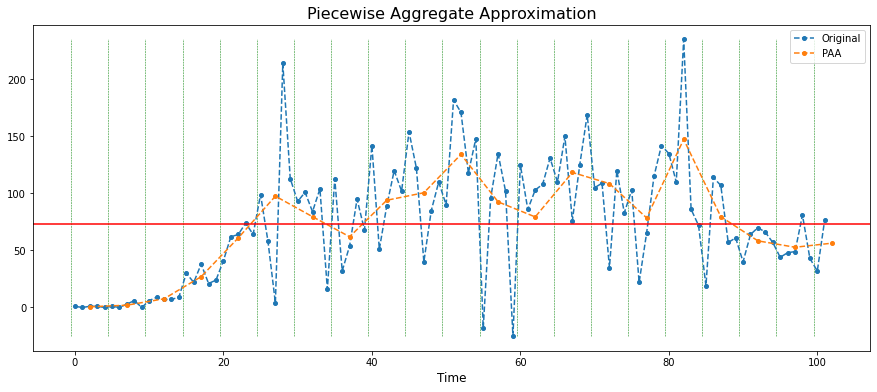

In [ ]:
# new daily data
from pyts.approximation import PiecewiseAggregateApproximation

X = new_dailycases_md.reshape(1, -1)

# Parameters
n_timestamps = len(X[0])
print('This is X[0]:',X[0])
#print(n_timestamps)
# PAA transformation
window_size = 5
paa = PiecewiseAggregateApproximation(window_size=window_size)
X_paa = paa.transform(X)

print('This is X',X)
print("this is X_paa",X_paa)
print(X_paa.shape)

# Show the results for the first time series
plt.figure(figsize=(15, 6))
plt.plot(X[0], 'o--', ms=4, label='Original')
plt.plot(np.arange(window_size // 2,
                   n_timestamps + window_size // 2,
                   window_size), X_paa[0], 'o--', ms=4, label='PAA')
plt.vlines(np.arange(0, n_timestamps, window_size) - 0.5,
           X[0].min(), X[0].max(), color='g', linestyles='--', linewidth=0.5)
plt.axhline(y=np.mean(X[0]),xmin=0.0, xmax=1.0, color='r')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('Piecewise Aggregate Approximation', fontsize=16)
#plt.xticks(labels=y,rotation=90)
plt.show()

####**SD for PAA Raw Data**

In [ ]:
print(X_paa)
print(X_paa.shape)
#Mean for raw data
cases_mean=np.mean(X_paa)
cases_sd=np.std(X_paa)
print("\nPAA Raw Data Mean value is:",cases_mean.round(2))
print("PAA Raw Data Std Dev. value is:",cases_sd.round(2))

#thresholds for raw data
prstdev3pos=cases_mean+3*cases_sd
prstdev3neg=cases_mean-3*cases_sd
print("\nwith 3 stdev positive value is",prstdev3pos.round(2),"and negative value is:",prstdev3neg.round(2))

prstdev2pos=cases_mean+2*cases_sd
prstdev2neg=cases_mean-2*cases_sd

print("\nwith two stdev positive value is",prstdev2pos.round(2),"and negative value is:",prstdev2neg.round(2))
prstdev1pos=cases_mean+cases_sd
prstdev1neg=cases_mean-cases_sd

prstdev15pos=cases_mean+1.5*cases_sd
prstdev15neg=cases_mean-1.5*cases_sd
print("\nwith 1.5 stdev positive value is",prstdev15pos.round(2),"and negative value is:",prstdev15neg.round(2))

print("\nwith 1 stdev positive value is",prstdev1pos.round(2),"and negative value is:",prstdev1neg.round(2))

[[  0.6   2.    7.6  27.   61.   97.6  79.6  62.   94.  100.6 134.2  92.6
   79.4 118.4 108.6  78.6 147.4  79.6  58.4  52.8  56.4]]
(1, 21)

PAA Raw Data Mean value is: 73.26
PAA Raw Data Std Dev. value is: 39.52

with 3 stdev positive value is 191.81 and negative value is: -45.3

with two stdev positive value is 152.3 and negative value is: -5.78

with 1.5 stdev positive value is 132.54 and negative value is: 13.98

with 1 stdev positive value is 112.78 and negative value is: 33.74


####**Matrix Profile**

(1, 20)


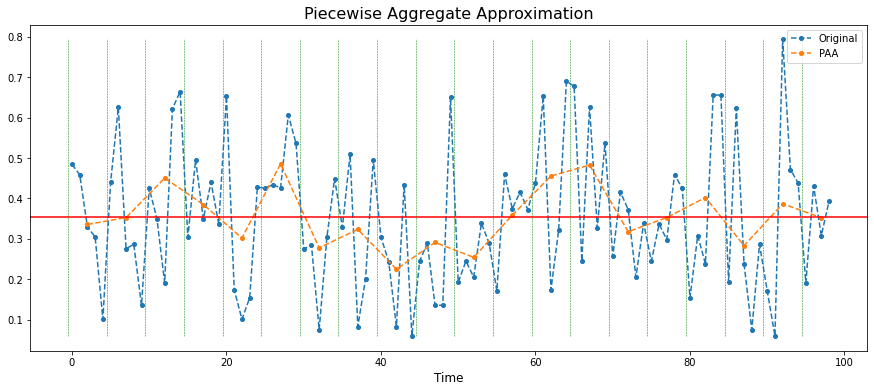

In [ ]:
# matrix profile data

X = profile[0].reshape(1, -1)

# Parameters
n_timestamps = len(X[0])

# PAA transformation
window_size = 5
paa = PiecewiseAggregateApproximation(window_size=window_size)
X_paa = paa.transform(X)
print(X_paa.shape)
# Show the results for the first time series
plt.figure(figsize=(15, 6))
plt.plot(X[0], 'o--', ms=4, label='Original')
plt.plot(np.arange(window_size // 2,
                   n_timestamps + window_size // 2,
                   window_size), X_paa[0], 'o--', ms=4, label='PAA')
plt.vlines(np.arange(0, n_timestamps, window_size) - 0.5,
           X[0].min(), X[0].max(), color='g', linestyles='--', linewidth=0.5)
plt.yticks()
plt.axhline(y=np.mean(profile[0]),xmin=0.0, xmax=1.0, color='r')
plt.legend(loc='best', fontsize=10)
plt.xlabel('Time', fontsize=12)
plt.title('Piecewise Aggregate Approximation', fontsize=16)
plt.show()

####**SD for Matrix Profile PAA**

In [ ]:
print(X_paa)
#Mean for raw data
cases_mean=np.mean(X_paa)
cases_sd=np.std(X_paa)
print("\nMatrix Profile PAA Mean value is:",cases_mean.round(2))
print("Matrix Profile PAA Std Dev. value is:",cases_sd.round(2))

#thresholds for raw data
mppstdev3pos=cases_mean+3*cases_sd
mppstdev3neg=cases_mean-3*cases_sd
print("\nwith 3 stdev positive value is",mppstdev3pos.round(2),"and negative value is:",mppstdev3neg.round(2))

mppstdev2pos=cases_mean+2*cases_sd
mppstdev2neg=cases_mean-2*cases_sd

print("\nwith two stdev positive value is",mppstdev2pos.round(2),"and negative value is:",mppstdev2neg.round(2))


mppstdev15pos=cases_mean+1.5*cases_sd
mppstdev15neg=cases_mean-1.5*cases_sd

print("\nwith 1.5 stdev positive value is",mppstdev15pos.round(2),"and negative value is:",mppstdev15neg.round(2))

mppstdev1pos=cases_mean+cases_sd
mppstdev1neg=cases_mean-cases_sd

print("\nwith 1 stdev positive value is",mppstdev1pos.round(2),"and negative value is:",mppstdev1neg.round(2))

[[0.33543521 0.35243429 0.45015895 0.3848067  0.30193958 0.48540559
  0.27761364 0.32329527 0.22478322 0.29104229 0.25400129 0.35847775
  0.45527033 0.48224311 0.3175059  0.35253506 0.40212484 0.28292951
  0.38659546 0.35211993]]

Matrix Profile PAA Mean value is: 0.35
Matrix Profile PAA Std Dev. value is: 0.07

with 3 stdev positive value is 0.57 and negative value is: 0.14

with two stdev positive value is 0.5 and negative value is: 0.21

with 1.5 stdev positive value is 0.46 and negative value is: 0.25

with 1 stdev positive value is 0.43 and negative value is: 0.28


###**Identification of Outliers**

**Raw Data**

In [ ]:
#Finding outliers based on SD

# Raw Data
dates_md = list(df_md_groupby.index)
idx = 0
for i in new_dailycases_md:
  if i > stdev3pos or i < stdev3neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

235 is outlier and the date is 2020-06-01


In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in new_dailycases_md:
  if i > stdev2pos or i < stdev2neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

214 is outlier and the date is 2020-04-08
182 is outlier and the date is 2020-05-01
235 is outlier and the date is 2020-06-01


In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in new_dailycases_md:
  if i > stdev15pos or i < stdev15neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

214 is outlier and the date is 2020-04-08
154 is outlier and the date is 2020-04-25
182 is outlier and the date is 2020-05-01
171 is outlier and the date is 2020-05-02
-18 is outlier and the date is 2020-05-05
-25 is outlier and the date is 2020-05-09
169 is outlier and the date is 2020-05-19
235 is outlier and the date is 2020-06-01


In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in new_dailycases_md:
  if i > stdev1pos or i < stdev1neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

1 is outlier and the date is 2020-03-11
0 is outlier and the date is 2020-03-12
1 is outlier and the date is 2020-03-13
1 is outlier and the date is 2020-03-14
0 is outlier and the date is 2020-03-15
1 is outlier and the date is 2020-03-16
0 is outlier and the date is 2020-03-17
3 is outlier and the date is 2020-03-18
6 is outlier and the date is 2020-03-19
0 is outlier and the date is 2020-03-20
6 is outlier and the date is 2020-03-21
9 is outlier and the date is 2020-03-22
7 is outlier and the date is 2020-03-23
7 is outlier and the date is 2020-03-24
9 is outlier and the date is 2020-03-25
4 is outlier and the date is 2020-04-07
214 is outlier and the date is 2020-04-08
16 is outlier and the date is 2020-04-14
142 is outlier and the date is 2020-04-20
154 is outlier and the date is 2020-04-25
182 is outlier and the date is 2020-05-01
171 is outlier and the date is 2020-05-02
148 is outlier and the date is 2020-05-04
-18 is outlier and the date is 2020-05-05
135 is outlier and the da

**PAA Raw Data**

In [ ]:
#Finding outliers based on SD

# PAA Raw Data
dates_md = list(df_md_groupby.index)
idx = 0
for i in new_dailycases_md:
  if i > prstdev3pos or i < prstdev3neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

214 is outlier and the date is 2020-04-08
235 is outlier and the date is 2020-06-01


In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in new_dailycases_md:
  if i > prstdev2pos or i < prstdev2neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

214 is outlier and the date is 2020-04-08
154 is outlier and the date is 2020-04-25
182 is outlier and the date is 2020-05-01
171 is outlier and the date is 2020-05-02
-18 is outlier and the date is 2020-05-05
-25 is outlier and the date is 2020-05-09
169 is outlier and the date is 2020-05-19
235 is outlier and the date is 2020-06-01


In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in new_dailycases_md:
  if i > prstdev15pos or i < prstdev15neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

1 is outlier and the date is 2020-03-11
0 is outlier and the date is 2020-03-12
1 is outlier and the date is 2020-03-13
1 is outlier and the date is 2020-03-14
0 is outlier and the date is 2020-03-15
1 is outlier and the date is 2020-03-16
0 is outlier and the date is 2020-03-17
3 is outlier and the date is 2020-03-18
6 is outlier and the date is 2020-03-19
0 is outlier and the date is 2020-03-20
6 is outlier and the date is 2020-03-21
9 is outlier and the date is 2020-03-22
7 is outlier and the date is 2020-03-23
7 is outlier and the date is 2020-03-24
9 is outlier and the date is 2020-03-25
4 is outlier and the date is 2020-04-07
214 is outlier and the date is 2020-04-08
142 is outlier and the date is 2020-04-20
154 is outlier and the date is 2020-04-25
182 is outlier and the date is 2020-05-01
171 is outlier and the date is 2020-05-02
148 is outlier and the date is 2020-05-04
-18 is outlier and the date is 2020-05-05
135 is outlier and the date is 2020-05-07
-25 is outlier and the d

In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in new_dailycases_md:
  if i > prstdev1pos or i < prstdev1neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

1 is outlier and the date is 2020-03-11
0 is outlier and the date is 2020-03-12
1 is outlier and the date is 2020-03-13
1 is outlier and the date is 2020-03-14
0 is outlier and the date is 2020-03-15
1 is outlier and the date is 2020-03-16
0 is outlier and the date is 2020-03-17
3 is outlier and the date is 2020-03-18
6 is outlier and the date is 2020-03-19
0 is outlier and the date is 2020-03-20
6 is outlier and the date is 2020-03-21
9 is outlier and the date is 2020-03-22
7 is outlier and the date is 2020-03-23
7 is outlier and the date is 2020-03-24
9 is outlier and the date is 2020-03-25
30 is outlier and the date is 2020-03-26
22 is outlier and the date is 2020-03-27
21 is outlier and the date is 2020-03-29
24 is outlier and the date is 2020-03-30
4 is outlier and the date is 2020-04-07
214 is outlier and the date is 2020-04-08
113 is outlier and the date is 2020-04-09
16 is outlier and the date is 2020-04-14
113 is outlier and the date is 2020-04-15
32 is outlier and the date is

**Matrix Profile based Outliers**

**Matrix Profile**

In [ ]:
#Finding outliers based on SD

# Matrix Profile

dates_md = list(df_md_groupby.index)
idx = 0
for i in profile[0]:
  if i > mstdev3pos or i < mstdev3neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in profile[0]:
  if i > mstdev2pos or i < mstdev2neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

0.7931452459479871 is outlier and the date is 2020-06-11


In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in profile[0]:
  if i > mstdev15pos or i < mstdev15neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

0.6253609429347875 is outlier and the date is 2020-03-17
0.6213989544738278 is outlier and the date is 2020-03-24
0.6643010839931062 is outlier and the date is 2020-03-25
0.6536479910738284 is outlier and the date is 2020-03-31
0.07470244293010794 is outlier and the date is 2020-04-12
0.08281457879955634 is outlier and the date is 2020-04-17
0.08281457879955634 is outlier and the date is 2020-04-22
0.059517705479732425 is outlier and the date is 2020-04-24
0.6507732767707745 is outlier and the date is 2020-04-29
0.6536479910738284 is outlier and the date is 2020-05-11
0.6894871553205005 is outlier and the date is 2020-05-14
0.6777282080175298 is outlier and the date is 2020-05-15
0.6253609429347875 is outlier and the date is 2020-05-17
0.6554242984207782 is outlier and the date is 2020-06-02
0.6557696068833196 is outlier and the date is 2020-06-03
0.6229988475536432 is outlier and the date is 2020-06-05
0.07470244293010794 is outlier and the date is 2020-06-07
0.059517705479732425 is o

In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in profile[0]:
  if i > mstdev1pos or i < mstdev1neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

0.10091877886737909 is outlier and the date is 2020-03-15
0.6253609429347875 is outlier and the date is 2020-03-17
0.1351493578100356 is outlier and the date is 2020-03-20
0.6213989544738278 is outlier and the date is 2020-03-24
0.6643010839931062 is outlier and the date is 2020-03-25
0.6536479910738284 is outlier and the date is 2020-03-31
0.17386146839250058 is outlier and the date is 2020-04-01
0.10091877886737909 is outlier and the date is 2020-04-02
0.15370176840859018 is outlier and the date is 2020-04-03
0.6058522333506318 is outlier and the date is 2020-04-08
0.5363472814930552 is outlier and the date is 2020-04-09
0.07470244293010794 is outlier and the date is 2020-04-12
0.08281457879955634 is outlier and the date is 2020-04-17
0.08281457879955634 is outlier and the date is 2020-04-22
0.059517705479732425 is outlier and the date is 2020-04-24
0.1351493578100356 is outlier and the date is 2020-04-27
0.13554280318229422 is outlier and the date is 2020-04-28
0.6507732767707745 is

**PAA Matrix Profile**

In [ ]:
#Finding outliers based on SD

# Matrix Profile

dates_md = list(df_md_groupby.index)
idx = 0
for i in X_paa[0]:
  if i > mppstdev3pos or i < mppstdev3neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in X_paa[0]:
  if i > mppstdev2pos or i < mppstdev2neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in X_paa[0]:
  if i > mppstdev15pos or i < mppstdev15neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

0.4854055888932173 is outlier and the date is 2020-03-16
0.2247832246313397 is outlier and the date is 2020-03-19
0.4822431129359773 is outlier and the date is 2020-03-24


In [ ]:
dates_md = list(df_md_groupby.index)
idx = 0
for i in X_paa[0]:
  if i > mppstdev1pos or i < mppstdev1neg:
   print(i,"is outlier and the date is", dates_md[idx])
  
  idx += 1

0.4501589455548551 is outlier and the date is 2020-03-13
0.4854055888932173 is outlier and the date is 2020-03-16
0.2776136444484581 is outlier and the date is 2020-03-17
0.2247832246313397 is outlier and the date is 2020-03-19
0.2540012898894486 is outlier and the date is 2020-03-21
0.4552703324330126 is outlier and the date is 2020-03-23
0.4822431129359773 is outlier and the date is 2020-03-24
